
50/50 up/down spin lattice:
[ 1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1
 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1
 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1
 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1
  1  1  1  1]
Energy = -0.16
Magnetization = 0.24

Up spin lattice:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Energy = -1.00
Magnetization = 1.00

 Down spin lattice
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Energy = -1.00
Magnetization = -1.00


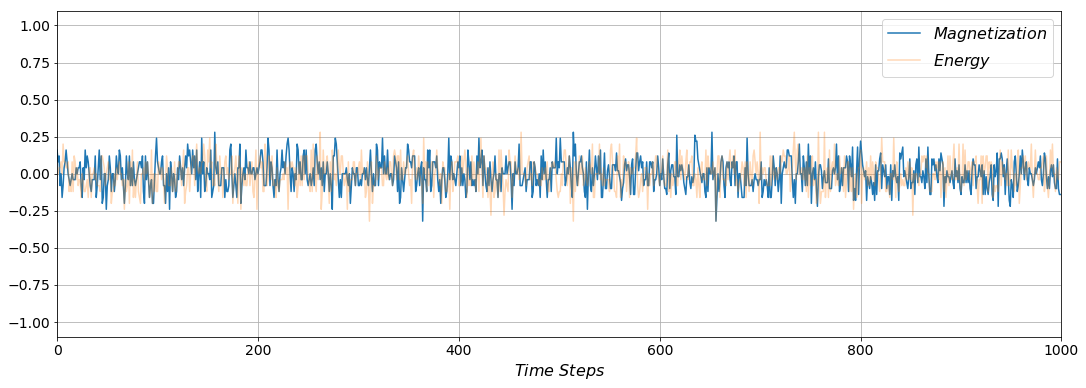

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

A demonstration of the dependence of the equillibirum lattice configuration on the lattice temperature, found by running metropolis for 1000 time steps at each of 10 temperatures:


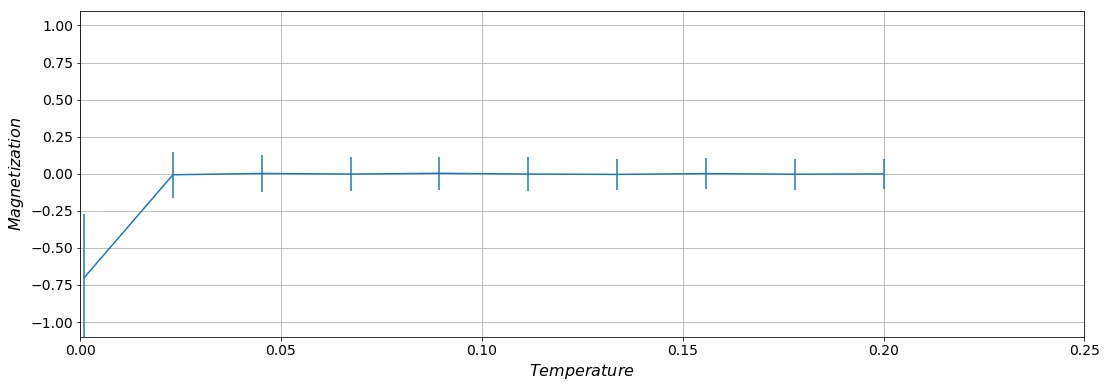

In [11]:
'''
A system always tries to lower its energy to reach a minimal energy equilibrium.
At temps near T=0, a system may lower its energy by ordering its states, i.e. the spins of its particles which results
    in a non-zero magnetic moment for the system. 
At high temps (T >> J, J being the coupling parameter of the spins of the system), entropic disorder causes the system
    to choose between various configurations in its phase space which minimize energy - in the 1D Ising Model, by
    allowing disordered (random) spin configurations which reduce the system's magnetization to zero. 

'''

'''
The 1D Ising Model: L particles each with 1/2 integer spin exist on a 2D circular (edge-edge rollover) lattice
Where J is the gauge coupling paramater between identical particles in the lattice, energy of the lattice is given by: 
    Energy = -J/L * sum from 0 to L[(spin value of each particle in lattice) * (sum spin value of corresponding adjacent particles in the lattice)]
Consequently, where U is the Bohr Magneton constant,
    (U = elementary charge * reduced planck constant / (2 * electron rest mass * speed of light))
    the magnetic moment of the lattice is given by
        Magnetic moment = U/L * sum from 0 to L[spin value of each particle in lattice]
        
The Metropolis Algortihm can be implemented to manipulate such a 2D spin lattice to obtain snapshots of random configurations
    (to get random samples) of such a lattice and ultimately to demonstrate how such a lattice moves towards a state of lower energy and towards zero magnetization. 
    Can use Metropolis algo to upscale to higher dimension spin lattice simulations   
'''

#%matplotlib inline 
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [18,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

from timeit import timeit
from numpy.random import rand, randint

L = 100          # lattice size is L
J = 1.0          # gauge coupling parameter
kB = 1.0         # the Boltzman constant

def metropolis( s, T ) : 
    '''
    This runs the Metropolis algorithm for one unit of "Monte Carlo
    time (MCT)", defined as N steps where N is the number of items in the
    ensemble. In this case this is L*L.
    '''
    L = len( s )
    oldE = energy( s )
    for n in range( L ) : # this loop is 1 MCT
        
        # flip a random spin and calculate deltaE
        i = randint( L )
        s[i] *= -1    # flip the i-th spin
        
        newE = energy( s )
        deltaE = newE - oldE

        # these are the Metropolis tests 
        if deltaE < 0 : 
            oldE = newE
            # keep the flipped spin because it lowers the energy
        elif rand( ) < np.exp(  - deltaE / ( kB * T ) ) : 
            oldE = newE
            # keep the spin flip because a random number in [0,1)
            # is less than exp( -dE / k_B T)
        else :
            # the spin flip is rejected 
            s[i] *= -1    # unflip the ij spin

    return s 




'''
Functions to calculate Energy (E) and Magnetic Moment (M) of the L*L spin lattice
Particles at the edge of the lattice rollover for adjacent calculation using periodic boundary conditions through np.roll
'''

def energy( s ) : 
    # this is the energy for each site
    E = -J * ( s * np.roll( s, 1 ) )
    # and this is the avg energy per site
    return np.sum( E ) / L

#Simple sum over spin of all particles
def magnetization( s ) : 
    return np.sum( s ) / L
   
#Creates an LxL lattice of random integer spins with probability (p) to be +1 (and 1-p to be -1)
def randomLattice( L, p ) : 
 
    return ( rand( L ) < p ) * 2 - 1  

p = 0.5          #probability for each particle to be spin-up (+1)


#Demonstration of simple case (50/50 up-down spin distribution) and extreme cases (all spins up or down) 
    #showing their associated energy and magnetic moments
spinLattice = randomLattice( L, p )
print('\n50/50 up/down spin lattice:')
print( spinLattice )
print( 'Energy = %3.2f' % energy( spinLattice ) ) 
print( 'Magnetization = %3.2f' % magnetization( spinLattice ) ) 

spinLattice = randomLattice( L, 1 )
print('\nUp spin lattice:')
print( spinLattice )
print( 'Energy = %3.2f' % energy( spinLattice ) ) 
print( 'Magnetization = %3.2f' % magnetization( spinLattice ) ) 

spinLattice = randomLattice( L, 0 )
print('\n Down spin lattice')
print( spinLattice )
print( 'Energy = %3.2f' % energy( spinLattice ) ) 
print( 'Magnetization = %3.2f' % magnetization( spinLattice ) ) 



n = 1000                           # the number of MCT steps
p = 0.5                             # probability for the initial random lattice

T = 199.0 * J / kB                    # temp of the system in terms of coupling parameter and boltzmann constant
        
E = np.zeros( n ) 
M = np.zeros( n )
spinLattice = randomLattice( L, p )

#Run metropolis algo for N time steps and record energy, magnetic moments of each random lattice config
for i in range( n ) : 
    spinLattice = metropolis( spinLattice, T )
    M[i] = magnetization( spinLattice )
    E[i] = energy( spinLattice )

#Visualize with a plot the markov chain which represents the spin lattice probability distribution
#The equilibrium configuration in the markov chain should be at minimal energy and magnetic moment 0
plt.plot( M, label='$Magnetization$' )
plt.plot( E, label='$Energy$', alpha=0.3 )

plt.xlabel( '$Time$' + ' ' + '$Steps$' )
plt.axis( [0,n,-1.1,+1.1] )
plt.legend( )
plt.show()

#show that the markov chain indeed has an equilibrium configuration at minimized energy and zero magnetization,
#taking the average of Energy/Magnetization as well as the deviation from equilibrium of visited random lattice configurations
display( Latex ( r'$Energy= %6.5f \pm %6.5f$' 
               % 
               ( np.average(E), np.std(E, ddof=1) ) ) 
       ) 
display( Latex( r'$Magnetization= %6.5f \pm %6.5f$' 
               % 
               ( np.average(M), np.std(M, ddof=1) ) ) 
       ) 


p = 0.5
n = 1000 

print('A demonstration of the dependence of the equillibirum lattice configuration on the lattice temperature, found by running metropolis for 1000 time steps at each of 10 temperatures:')
# ten temps in the interval 0 < kB*T < 2*J for demonstration of magnetic alignment w.r.t lattice temperature
Ts = np.linspace( 0.001, .2, 10 ) * J / kB  
spinLattice = randomLattice( L, p )

#storage for magnetic moment value and stdev value at each temp
Mbar = np.zeros( len(Ts) )
Msigma = np.zeros( len(Ts) )

#use metropolis algo to sample magnetization distributions of random 2D lattices as a function of their temperature
for j in range( len( Ts ) ) :  # these are the temperatures
    M = np.zeros( n )
    for i in range( n ) : # these are the MCT steps
        spinLattice = metropolis( spinLattice, Ts[j] )
        M[i] = magnetization( spinLattice ) 
    # store the average and standard deviation for this temperature
    Mbar[j] = np.average( M ) 
    Msigma[j] = np.std( M ) 

    
plt.errorbar( Ts, Mbar, yerr=Msigma)
plt.axis( [0,.25,-1.1,+1.1] )
plt.xlabel('$Temperature$')
plt.ylabel('$Magnetization$')
plt.show()
